# Plot atmospheric sounding
Get the data from Wyoming University and create the plot.

In [27]:
from datetime import datetime
from metpy.units import units
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.calc import cape_cin, dewpoint_from_relative_humidity, parcel_profile
import metpy.calc as mpcalc
from metpy.plots import SkewT
import matplotlib.pyplot as plt
import numpy as np

In [8]:
date = datetime(2023, 6, 28, 12)
station = '60018'

In [9]:
df = WyomingUpperAir.request_data(date, station)

In [56]:
parcel_profile?

In [57]:
p = df["pressure"].values * units.hPa
T = df["temperature"].values * units.degC
Td = df["dewpoint"].values * units.degC
prof = parcel_profile(p, T[8], Td[8]).to('degC')
cape_cin(p, T, Td, prof)

(0 <Unit('joule / kilogram')>, 0 <Unit('joule / kilogram')>)

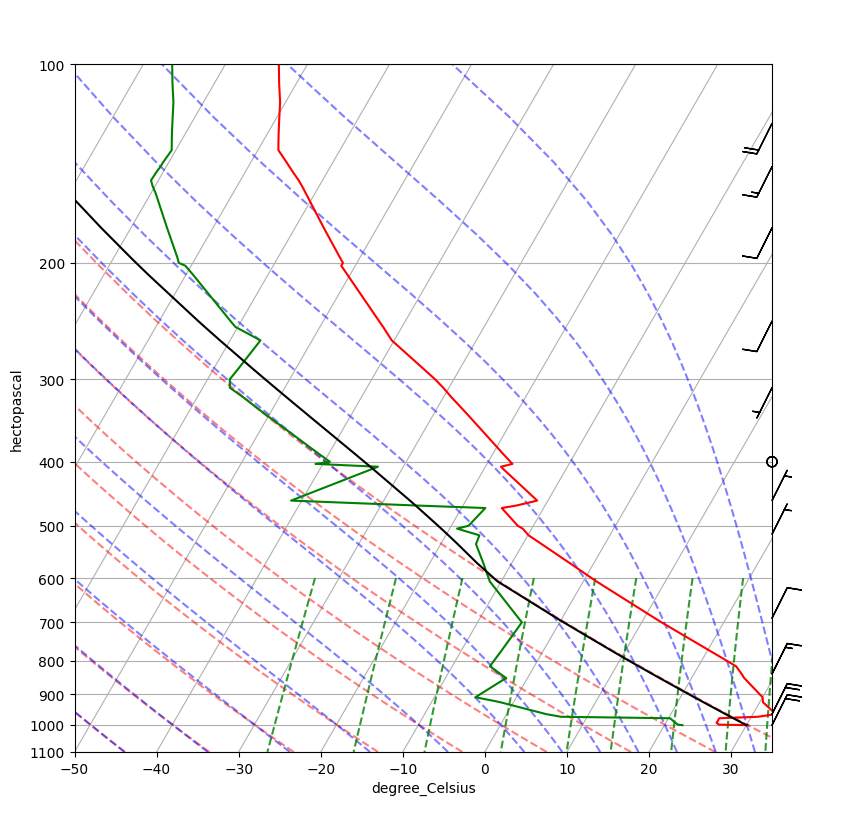

In [58]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
u = np.linspace(-10, 10, len(p)) * units.knots
v = np.linspace(-20, 20, len(p)) * units.knots

skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot(p, prof, 'k')  # Plot parcel profile
skew.plot_barbs(p[::5], u[::5], v[::5])

skew.ax.set_xlim(-50, 35)
skew.ax.set_ylim(1100, 100)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.show()
